In [169]:
import pandas as pd
import numpy as np

from statistics import stdev
from scipy.stats import mode

from IPython.display import IFrame, display

import matplotlib.pyplot as plt
import seaborn as sns


# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay





%run ../all_studies/us_common_functions.ipynb






#########################################
window_size=10
overlappping_window=False
#########################################




data_dir = '../../data/sim2/'
fig_dir = '../../figure/sim2/'





In [170]:
df = pd.read_csv(data_dir + 'data_2.csv')
df.head()

,Time,Drive,Perinasal,Palm,Heart,Breathing,Subject,Gender,Age,Type_AB,Pre-tai,Pre-sai,Post-tai,Drive_Label,Effort,Frustration,Mental Demand,Performance,Physical Demand,Temporal Demand,NASA Total Sum,STAI
0,0,1,0.004256,0.4471,0.0,22.4,22,Female,22,260,34,21,34.0,RB,NaN,NaN,NaN,NaN,NaN,NaN,0.0,34.0
1,2,1,0.004622,0.4844,0.0,22.8,22,Female,22,260,34,21,34.0,RB,NaN,NaN,NaN,NaN,NaN,NaN,0.0,34.0
2,3,1,0.004568,0.4471,0.0,22.8,22,Female,22,260,34,21,34.0,RB,NaN,NaN,NaN,NaN,NaN,NaN,0.0,34.0
3,4,1,0.004404,0.4844,0.0,23.6,22,Female,22,260,34,21,34.0,RB,NaN,NaN,NaN,NaN,NaN,NaN,0.0,34.0
4,5,1,0.004529,0.4844,0.0,23.6,22,Female,22,260,34,21,34.0,RB,NaN,NaN,NaN,NaN,NaN,NaN,0.0,34.0


In [171]:
df.columns

Index(['Time', 'Drive', 'Perinasal', 'Palm', 'Heart', 'Breathing', 'Subject',
       'Gender', 'Age', 'Type_AB', 'Pre-tai', 'Pre-sai', 'Post-tai',
       'Drive_Label', 'Effort', 'Frustration', 'Mental Demand', 'Performance',
       'Physical Demand', 'Temporal Demand', 'NASA Total Sum', 'STAI'],
      dtype='object')

In [172]:
print('Total Subjects: ' + str(len(df.Subject.unique())))
print(df.Subject.unique())

Total Subjects: 23
[22 23 24 25 26 27 37 38 39 40 43 45 46 47 48 49 52 53 54 56 63 64 65]


# Creating csv for additional plots for paper -->

In [173]:
df['Treatment'] = df['Drive_Label']
df['TimeElapsed'] = df.groupby(['Subject', 'Treatment']).cumcount()+1
df.to_csv(data_dir + "data_2.1.csv", sep=',', index=False)


plot_df = df.copy()



plot_df['Perinasal_Log'] = np.log(plot_df['Perinasal'])


def quality_control_phase1(df, col, validMin, validMax):
    return df[(validMin <= df[col]) & (df[col] <= validMax)]

print(plot_df.shape)
plot_df = quality_control_phase1(plot_df, 'Heart', 40, 140)
plot_df = quality_control_phase1(plot_df, 'Breathing', 4, 40)
print(plot_df.shape)


plot_df.to_csv(data_dir + "data_2.2.csv", sep=',', index=False)

(57102, 25)
(50689, 25)


In [174]:
# CHECK NA/Null
df.isnull().sum()

Time                   0
Drive                  0
Perinasal           1667
Palm               26963
Heart               3406
Breathing           3406
Subject                0
Gender                 0
Age                    0
Type_AB                0
Pre-tai                0
Pre-sai                0
Post-tai               0
Drive_Label            0
Effort             16805
Frustration        16805
Mental Demand      16805
Performance        16805
Physical Demand    16805
Temporal Demand    16805
NASA Total Sum         0
STAI                   0
Treatment              0
TimeElapsed            0
dtype: int64

In [175]:
print(df.Treatment.unique())
df = df[df['Treatment'].isin(['RB', 'CD', 'MD'])]
print(df.Treatment.unique())

['RB' 'PD' 'ND' 'CD' 'MD' 'FD']
['RB' 'CD' 'MD']


In [176]:
df.isnull().sum()

Time                   0
Drive                  0
Perinasal            986
Palm               14845
Heart               1428
Breathing           1428
Subject                0
Gender                 0
Age                    0
Type_AB                0
Pre-tai                0
Pre-sai                0
Post-tai               0
Drive_Label            0
Effort              6803
Frustration         6803
Mental Demand       6803
Performance         6803
Physical Demand     6803
Temporal Demand     6803
NASA Total Sum         0
STAI                   0
Treatment              0
TimeElapsed            0
dtype: int64

In [177]:
df.drop('Palm', axis=1, inplace=True)
df.isnull().sum()

Time                  0
Drive                 0
Perinasal           986
Heart              1428
Breathing          1428
Subject               0
Gender                0
Age                   0
Type_AB               0
Pre-tai               0
Pre-sai               0
Post-tai              0
Drive_Label           0
Effort             6803
Frustration        6803
Mental Demand      6803
Performance        6803
Physical Demand    6803
Temporal Demand    6803
NASA Total Sum        0
STAI                  0
Treatment             0
TimeElapsed           0
dtype: int64

In [178]:
def get_range(df, col):
    return [df[col].min(), df[col].max()]

print(get_range(df, 'Perinasal'))
print(get_range(df, 'Heart'))
print(get_range(df, 'Breathing'))


[0.002598380422459, 0.018258435]
[0.0, 122.0]
[0.0, 32.1]


In [179]:
def quality_control_phase1(df, col, validMin, validMax):
    return df[(validMin <= df[col]) & (df[col] <= validMax)]

print(df.shape)
df = quality_control_phase1(df, 'Heart', 40, 140)
df = quality_control_phase1(df, 'Breathing', 4, 40)
print(df.shape)

print(get_range(df, 'Heart'))
print(get_range(df, 'Breathing'))

(30647, 23)
(28005, 23)
[41.0, 122.0]
[4.0, 28.7]


In [180]:
df['Perinasal_Log'] = np.log(df['Perinasal'])

In [181]:
print(df.columns)

Index(['Time', 'Drive', 'Perinasal', 'Heart', 'Breathing', 'Subject', 'Gender',
       'Age', 'Type_AB', 'Pre-tai', 'Pre-sai', 'Post-tai', 'Drive_Label',
       'Effort', 'Frustration', 'Mental Demand', 'Performance',
       'Physical Demand', 'Temporal Demand', 'NASA Total Sum', 'STAI',
       'Treatment', 'TimeElapsed', 'Perinasal_Log'],
      dtype='object')


In [182]:
# ----------------------------------------------------------------------
# Baseline, Normal, Preparation, Cognitive, Motoric, and Failure Drive
# ----------------------------------------------------------------------
# ## OSF Dataset -->
# -------------------------
# ##### 1 --> Resting Baseline
# ##### 2 --> Practice Drive XX (not needed)
# ##### 4-5 ---------> Random Ordered Drive
# ##### 3 --> Normal Drive
# ##### 4 --> Cognitive Drive
# ##### 5 --> Sensorimotor Drivse
# ##### 6 --> Failure Drive XX (not needed)


# No Emotional Drive

In [183]:
df.groupby(['Subject'])['Drive'].agg(['nunique','min','max','count'])

,nunique,min,max,count
Subject,,,,
22,2,4,5,1063
23,2,1,4,657
24,2,1,5,121
25,3,1,5,1330
26,3,1,5,1295
27,3,1,5,1369
37,3,1,5,1417
38,3,1,5,1364
39,3,1,5,1408


In [184]:
df[df.Subject==22].Treatment.unique()

array(['CD', 'MD'], dtype=object)

In [185]:
def get_mean(df, col_name):
    return df.groupby(['Subject', 'Treatment'])[col_name].transform('mean')

def get_baseline_mean(df, col_name):
    return df[col_name].iloc[0]

In [186]:
df['PP_Mean'] = get_mean(df, 'Perinasal_Log')
df['HR_Mean'] = get_mean(df, 'Heart')
df['BR_Mean'] = get_mean(df, 'Breathing')

In [187]:
grouped_df = df.groupby(['Subject', 'Treatment', 'PP_Mean', 'HR_Mean', 'BR_Mean'], as_index = False)['Time'].count()
rb_df = grouped_df[(grouped_df.Treatment == 'RB')][['Subject', 'Treatment', 'PP_Mean', 'HR_Mean', 'BR_Mean']]
rb_df.rename(columns = {
            'PP_Mean': 'PP_RB_Mean',
            'HR_Mean': 'HR_RB_Mean',
            'BR_Mean': 'BR_RB_Mean',}, inplace=True)
rb_df.to_csv(data_dir + 'rb_data.csv', sep=',')

In [188]:
df.Subject.unique()

array([22, 23, 24, 25, 26, 27, 37, 38, 39, 40, 43, 45, 46, 47, 48, 49, 52,
       53, 54, 56, 64, 65])

In [189]:
df_arousal = pd.DataFrame()

for subj in df['Subject'].unique():
    subj_df = df.copy()[df.Subject == subj]
    rd_df = subj_df.copy()[subj_df.Treatment == 'RB']
    
    if rd_df.shape[0]:  # If there is any row for Resting Baseline
        subj_df['PP_Normalized'] = subj_df.Perinasal_Log - get_baseline_mean(rd_df, 'PP_Mean')
        subj_df['HR_Normalized'] = subj_df.Heart - get_baseline_mean(rd_df, 'HR_Mean')
        subj_df['BR_Normalized'] = subj_df.Breathing - get_baseline_mean(rd_df, 'BR_Mean')

        df_arousal = df_arousal.append(subj_df)
    
df_arousal.columns

Index(['Time', 'Drive', 'Perinasal', 'Heart', 'Breathing', 'Subject', 'Gender',
       'Age', 'Type_AB', 'Pre-tai', 'Pre-sai', 'Post-tai', 'Drive_Label',
       'Effort', 'Frustration', 'Mental Demand', 'Performance',
       'Physical Demand', 'Temporal Demand', 'NASA Total Sum', 'STAI',
       'Treatment', 'TimeElapsed', 'Perinasal_Log', 'PP_Mean', 'HR_Mean',
       'BR_Mean', 'PP_Normalized', 'HR_Normalized', 'BR_Normalized'],
      dtype='object')

In [190]:
print_row_count(df_arousal, 'Drive')

print(df_arousal.shape)
df_arousal = df_arousal.dropna()
print(df_arousal.shape)

print_row_count(df_arousal, 'Drive')

df_arousal.to_csv(data_dir + "data_2.3.csv", sep=',')
print(df_arousal.columns)

       Drive
Drive       
1       6024
4      10483
5      10435 

(26942, 30)
(20115, 30)
       Drive
Drive       
4      10165
5       9950 

Index(['Time', 'Drive', 'Perinasal', 'Heart', 'Breathing', 'Subject', 'Gender',
       'Age', 'Type_AB', 'Pre-tai', 'Pre-sai', 'Post-tai', 'Drive_Label',
       'Effort', 'Frustration', 'Mental Demand', 'Performance',
       'Physical Demand', 'Temporal Demand', 'NASA Total Sum', 'STAI',
       'Treatment', 'TimeElapsed', 'Perinasal_Log', 'PP_Mean', 'HR_Mean',
       'BR_Mean', 'PP_Normalized', 'HR_Normalized', 'BR_Normalized'],
      dtype='object')


In [191]:
print_row_count(df_arousal, 'Treatment')


# Removing 'RB' from dataset, as 'RB' will not be included in the model
print(df_arousal.shape, df_arousal.Treatment.unique())
df_arousal = df_arousal[~df_arousal.Treatment.isin(['RB', 'ND'])]
print(df_arousal.shape, df_arousal.Treatment.unique())


print_row_count(df_arousal, 'Treatment')

           Treatment
Treatment           
CD             10165
MD              9950 

(20115, 30) ['CD' 'MD']
(20115, 30) ['CD' 'MD']
           Treatment
Treatment           
CD             10165
MD              9950 



In [192]:
df.shape

(28005, 27)

In [193]:
df_arousal.isnull().sum()

Time               0
Drive              0
Perinasal          0
Heart              0
Breathing          0
Subject            0
Gender             0
Age                0
Type_AB            0
Pre-tai            0
Pre-sai            0
Post-tai           0
Drive_Label        0
Effort             0
Frustration        0
Mental Demand      0
Performance        0
Physical Demand    0
Temporal Demand    0
NASA Total Sum     0
STAI               0
Treatment          0
TimeElapsed        0
Perinasal_Log      0
PP_Mean            0
HR_Mean            0
BR_Mean            0
PP_Normalized      0
HR_Normalized      0
BR_Normalized      0
dtype: int64

-----------------------------------------
# Remove the NA rows for PP, HR and BR
-----------------------------------------

In [194]:
print(df_arousal.shape, str(len(df_arousal.Subject.unique())))
df_arousal.dropna(inplace=True)
print(df_arousal.shape, str(len(df_arousal.Subject.unique())))

(20115, 30) 21
(20115, 30) 21


In [195]:
df_arousal.isnull().sum()

Time               0
Drive              0
Perinasal          0
Heart              0
Breathing          0
Subject            0
Gender             0
Age                0
Type_AB            0
Pre-tai            0
Pre-sai            0
Post-tai           0
Drive_Label        0
Effort             0
Frustration        0
Mental Demand      0
Performance        0
Physical Demand    0
Temporal Demand    0
NASA Total Sum     0
STAI               0
Treatment          0
TimeElapsed        0
Perinasal_Log      0
PP_Mean            0
HR_Mean            0
BR_Mean            0
PP_Normalized      0
HR_Normalized      0
BR_Normalized      0
dtype: int64

In [196]:
print('Total Subjects: ' + str(len(df.Subject.unique())))
unique_subjs = df.Subject.unique()
print(unique_subjs)
print('\n')


print('After removing NA rows, Total Subjects: ' + str(len(df_arousal.Subject.unique())))
unique_subjs = df_arousal.Subject.unique()
print(unique_subjs)

Total Subjects: 22
[22 23 24 25 26 27 37 38 39 40 43 45 46 47 48 49 52 53 54 56 64 65]


After removing NA rows, Total Subjects: 21
[23 24 25 26 27 37 38 39 40 43 45 46 47 48 49 52 53 54 56 64 65]


In [197]:
df_arousal.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [198]:
def get_mean(df, col_name):
    return df[col_name].mean() 

def get_sd(df, col_name):
    return stdev(df[col_name])

def convert_str(num):
    return(str(round(num, 2)))

def print_mean_sd_stress_marker(signal, mean, sd, stress_marker): 
    print(signal + ":\t" + convert_str(mean) + u" \u00B1 " + convert_str(sd) 
          + "\tstress_marker: " + convert_str(stress_marker))


In [199]:
############################################################################################
pp_diff_mean = get_mean(df_arousal, 'PP_Normalized')
pp_diff_sd = get_sd(df_arousal, 'PP_Normalized')

pp_stress_marker = pp_diff_mean + 0.5*pp_diff_sd

df_arousal.loc[df_arousal.PP_Normalized < pp_stress_marker, 'PP_Arousal'] = 'relaxed'
df_arousal.loc[df_arousal.PP_Normalized >= pp_stress_marker, 'PP_Arousal'] = 'stressed'
############################################################################################



############################################################################################
pp_2_stress_marker = pp_diff_mean

df_arousal.loc[df_arousal.PP_Normalized < pp_2_stress_marker, 'PP_Arousal_2'] = 'relaxed'
df_arousal.loc[df_arousal.PP_Normalized >= pp_2_stress_marker, 'PP_Arousal_2'] = 'stressed'
############################################################################################




############################################################################################
hr_diff_mean = get_mean(df_arousal, 'HR_Normalized')
hr_diff_sd = get_sd(df_arousal, 'HR_Normalized')

hr_stress_marker = 0

df_arousal.loc[df_arousal.HR_Normalized < hr_stress_marker, 'HR_Arousal'] = 'relaxed'
df_arousal.loc[df_arousal.HR_Normalized >= hr_stress_marker, 'HR_Arousal'] = 'stressed'
############################################################################################




############################################################################################
br_diff_mean = get_mean(df_arousal, 'BR_Normalized')
br_diff_sd = get_sd(df_arousal, 'BR_Normalized')

br_stress_marker = 0

df_arousal.loc[df_arousal.BR_Normalized < br_stress_marker, 'BR_Arousal'] = 'relaxed'
df_arousal.loc[df_arousal.BR_Normalized >= br_stress_marker, 'BR_Arousal'] = 'stressed'
############################################################################################

    
    
############################################################################################
print_mean_sd_stress_marker('PP', pp_diff_mean, pp_diff_sd, pp_stress_marker)
print_mean_sd_stress_marker('PP_2', pp_diff_mean, pp_diff_sd, pp_2_stress_marker)
print_mean_sd_stress_marker('HR', hr_diff_mean, hr_diff_sd, hr_stress_marker)
print_mean_sd_stress_marker('BR', br_diff_mean, br_diff_sd, br_stress_marker)
############################################################################################

# ############################################################################################
# print(round(pp_diff_mean, 2), round(pp_diff_sd, 2), round(pp_stress_marker, 2))
# print(round(pp_diff_mean, 2), round(pp_diff_sd, 2), round(pp_2_stress_marker, 2))
# print(round(hr_diff_mean, 2), round(hr_diff_sd, 2), round(hr_stress_marker, 2))
# print(round(br_diff_mean, 2), round(br_diff_sd, 2), round(br_stress_marker, 2))
# ############################################################################################



# 'PP_Normalized', 'HR_Normalized', 'BR_Normalized'

PP:	0.1 ± 0.2	stress_marker: 0.2
PP_2:	0.1 ± 0.2	stress_marker: 0.1
HR:	1.74 ± 6.42	stress_marker: 0
BR:	2.9 ± 4.49	stress_marker: 0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


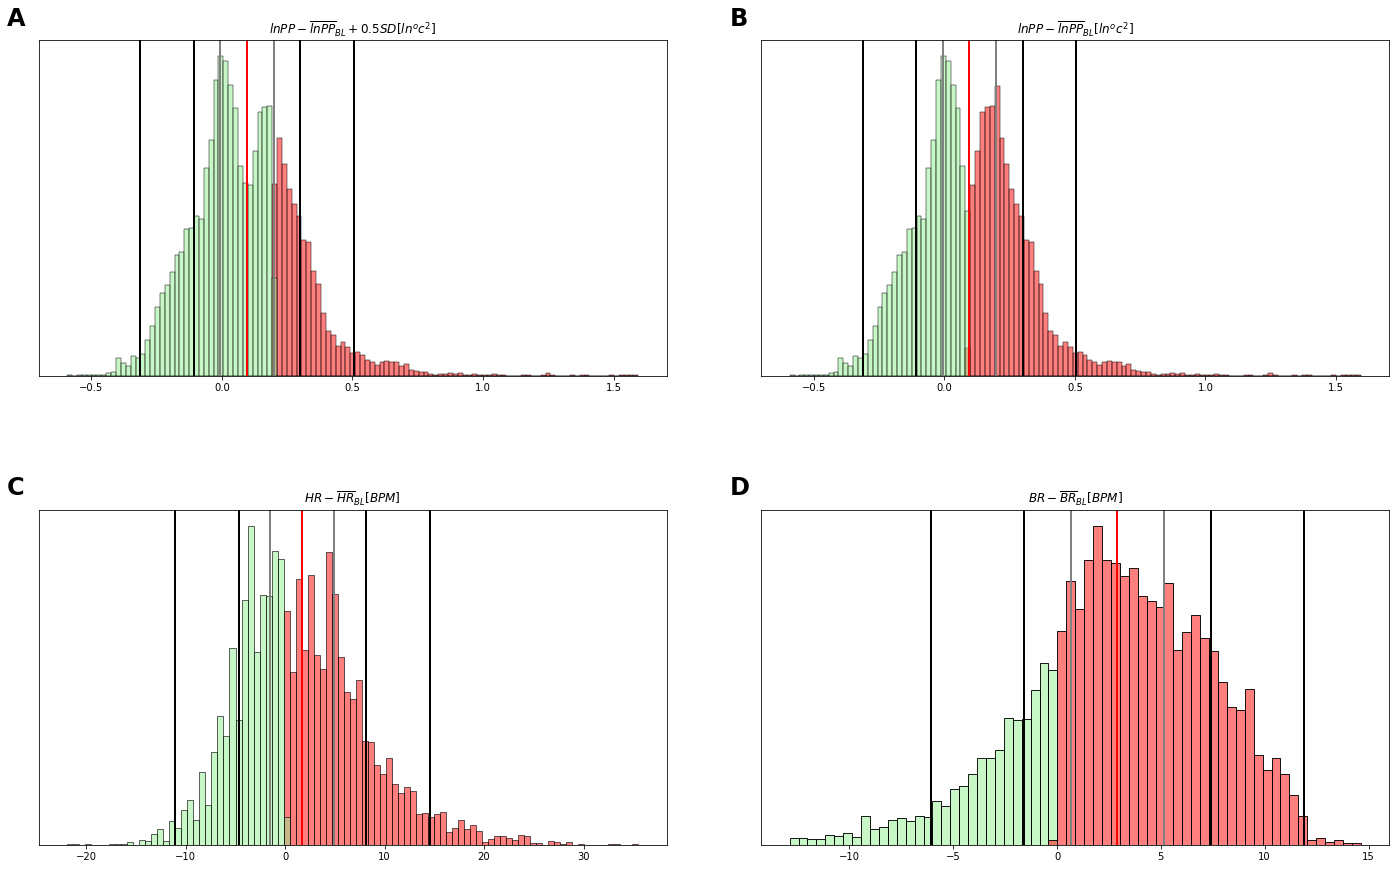

In [200]:
line_width = 2
palette ={"relaxed": "lightgreen", "stressed": "red"}


fig = plt.figure()

# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
fig.set_size_inches(20, 12, forward=True)
fig.subplots_adjust(
    top=0.98,
    bottom=0.049,
    left=0.042,
    right=0.98,
    hspace=0.4,
    wspace=0.15
)

for i, label in enumerate(('A', 'B', 'C', 'D')):
# for i, label in enumerate(('A')):
    ax = fig.add_subplot(2, 2, i+1)
    generate_arousal_extraction_plots(df_arousal, i)
    ax.text(-0.05, 
            1.1, 
            label, 
            transform=ax.transAxes,
            fontsize=24, 
            fontweight='bold', 
            va='top', 
            ha='left')
    
      
# fig.tight_layout()
fig.savefig(fig_dir + 'sim2_pp_br_hr_arousal_extraction.pdf', dpi=300, bbox_inches='tight')
plt.show()

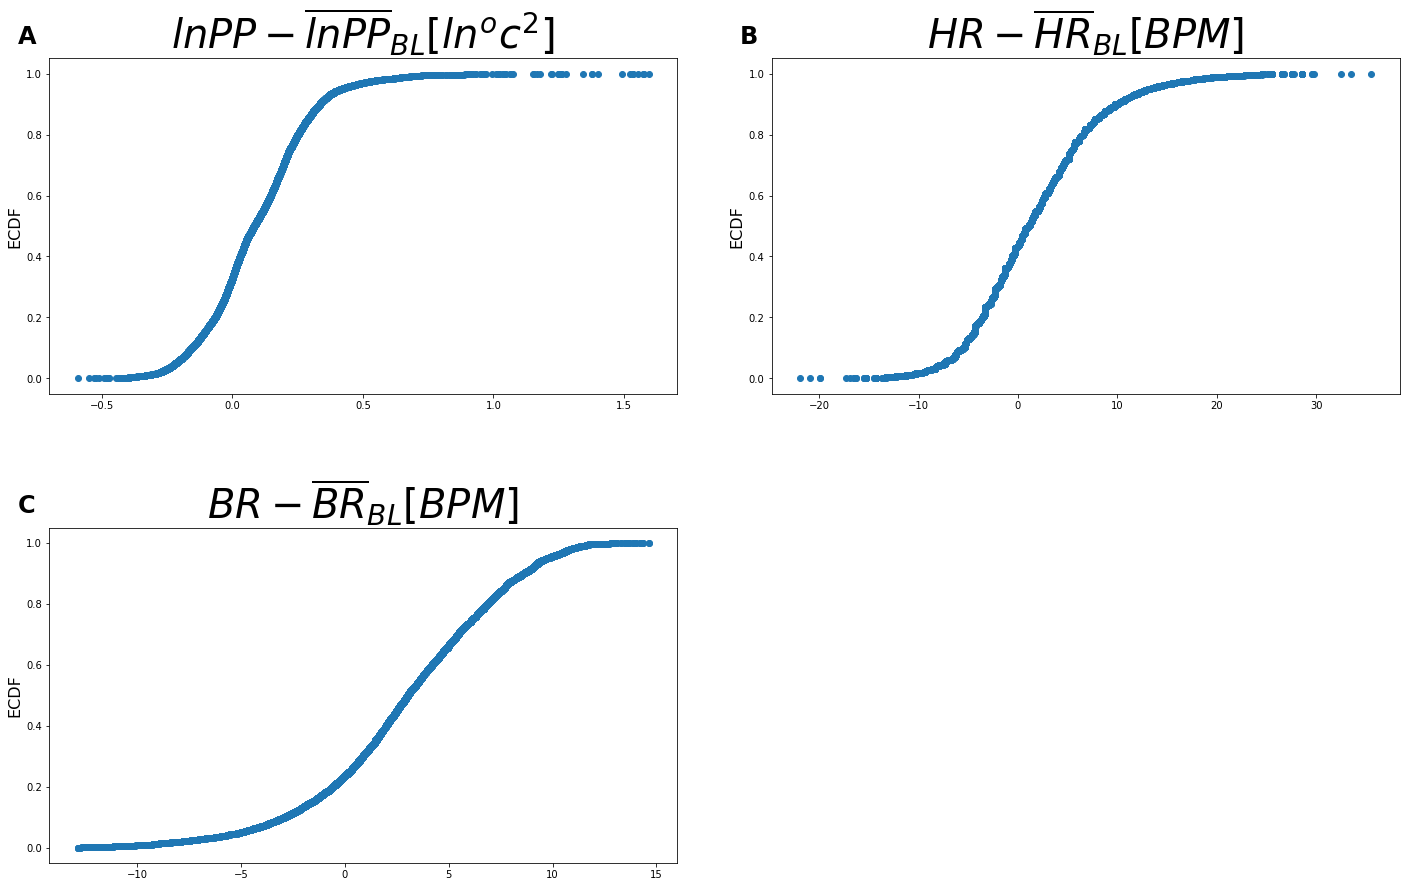

In [201]:
fig = plt.figure()

# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
fig.set_size_inches(20, 12, forward=True)
fig.subplots_adjust(
    top=0.98,
    bottom=0.049,
    left=0.042,
    right=0.98,
    hspace=0.4,
    wspace=0.15
)

for i, label in enumerate(('A', 'B', 'C')):
# for i, label in enumerate(('A')):
    ax = fig.add_subplot(2, 2, i+1)
    df_arousal = generate_ecdf_plots(df_arousal, i)
    ax.text(-0.05, 
            1.1, 
            label, 
            transform=ax.transAxes,
            fontsize=24, 
            fontweight='bold', 
            va='top', 
            ha='left')
    
      
# fig.tight_layout()
fig.savefig(fig_dir + 'sim2_pp_br_hr_ecdf.png', dpi=300, bbox_inches='tight')
fig.savefig(fig_dir + 'sim2_pp_br_hr_ecdf.pdf', dpi=300, bbox_inches='tight')
plt.show()   

In [202]:
signals = ['PP', 'HR', 'BR']
df_arousal = generate_ecdf_arousal_cols(df_arousal, signals)

                 PP_Arousal_ecdf
PP_Arousal_ecdf                 
neutral                     34.0
relaxed                     33.0
stressed                    33.0 

                 HR_Arousal_ecdf
HR_Arousal_ecdf                 
neutral                    34.19
relaxed                    32.62
stressed                   33.18 

                 BR_Arousal_ecdf
BR_Arousal_ecdf                 
neutral                    33.98
relaxed                    32.97
stressed                   33.05 

                    PP_HR_Arousal_ecdf
PP_HR_Arousal_ecdf                    
neutral                          55.47
relaxed                          22.84
stressed                         21.70 

                    PP_BR_Arousal_ecdf
PP_BR_Arousal_ecdf                    
neutral                          58.54
relaxed                          20.77
stressed                         20.70 

                    HR_BR_Arousal_ecdf
HR_BR_Arousal_ecdf                    
neutral                    

In [203]:
df_arousal.to_csv(data_dir + "data_2.5.csv", sep=',')
print(df_arousal.Treatment.unique())
print(df_arousal.columns)

['CD' 'MD']
Index(['Time', 'Drive', 'Perinasal', 'Heart', 'Breathing', 'Subject', 'Gender',
       'Age', 'Type_AB', 'Pre-tai', 'Pre-sai', 'Post-tai', 'Drive_Label',
       'Effort', 'Frustration', 'Mental Demand', 'Performance',
       'Physical Demand', 'Temporal Demand', 'NASA Total Sum', 'STAI',
       'Treatment', 'TimeElapsed', 'Perinasal_Log', 'PP_Mean', 'HR_Mean',
       'BR_Mean', 'PP_Normalized', 'HR_Normalized', 'BR_Normalized',
       'PP_Arousal', 'PP_Arousal_2', 'HR_Arousal', 'BR_Arousal', 'PP_ecdf',
       'HR_ecdf', 'BR_ecdf', 'PP_HR_ecdf', 'PP_BR_ecdf', 'HR_BR_ecdf',
       'PP_HR_BR_ecdf', 'PP_Arousal_ecdf', 'HR_Arousal_ecdf',
       'BR_Arousal_ecdf', 'PP_HR_Arousal_ecdf', 'PP_BR_Arousal_ecdf',
       'HR_BR_Arousal_ecdf', 'PP_HR_BR_Arousal_ecdf'],
      dtype='object')


In [204]:
final_df = get_non_overlapping_aggregrated_df(df_arousal)

Subject Processing: 
23
24
25
26
27
37
38
39
                 PP_Arousal_Mode
PP_Arousal_Mode                 
neutral                    40.89
relaxed                    24.44
stressed                   34.67 

                 HR_Arousal_Mode
HR_Arousal_Mode                 
neutral                    33.63
relaxed                    35.26
stressed                   31.11 

                 BR_Arousal_Mode
BR_Arousal_Mode                 
neutral                    35.85
relaxed                    27.41
stressed                   36.74 

                    PP_HR_Arousal_Mode
PP_HR_Arousal_Mode                    
neutral                           47.7
relaxed                           24.0
stressed                          28.3 

                    PP_BR_Arousal_Mode
PP_BR_Arousal_Mode                    
neutral                          57.04
relaxed                          16.15
stressed                         26.81 

                    HR_BR_Arousal_Mode
HR_BR_Arousal_Mode   

In [205]:
final_df.isnull().sum()

Subject                  0
Treatment                0
Age                      0
Effort                   0
Frustration              0
Mental_Demand            0
Performance              0
Physical_Demand          0
Temporal_Demand          0
NASA_Total_Sum           0
PP_Arousal_Mode          0
HR_Arousal_Mode          0
BR_Arousal_Mode          0
PP_HR_Arousal_Mode       0
PP_BR_Arousal_Mode       0
HR_BR_Arousal_Mode       0
PP_HR_BR_Arousal_Mode    0
PP_Mean                  0
PP_Median                0
PP_SD                    0
PP_SS                    0
Hr_Mean                  0
Hr_Median                0
Hr_SD                    0
Hr_SS                    0
Br_Mean                  0
Br_Median                0
Br_SD                    0
Br_SS                    0
Gender_Female            0
Gender_Male              0
dtype: int64

In [206]:
final_df.Treatment.unique()

array(['CD', 'MD'], dtype=object)

In [207]:
final_df.to_csv(data_dir + "data_3.csv", sep=',', index=False)

-----------------------------------------------------
# This part is to get info for paper/report
-----------------------------------------------------

In [208]:
final_df = pd.read_csv(data_dir + "data_3.csv")
final_df.head()

,Subject,Treatment,Age,Effort,Frustration,Mental_Demand,Performance,Physical_Demand,Temporal_Demand,NASA_Total_Sum,PP_Arousal_Mode,HR_Arousal_Mode,BR_Arousal_Mode,PP_HR_Arousal_Mode,PP_BR_Arousal_Mode,HR_BR_Arousal_Mode,PP_HR_BR_Arousal_Mode,PP_Mean,PP_Median,PP_SD,PP_SS,Hr_Mean,Hr_Median,Hr_SD,Hr_SS,Br_Mean,Br_Median,Br_SD,Br_SS,Gender_Female,Gender_Male
0,23,CD,20,15.0,2.0,17.0,19.0,3.0,2.0,58.0,relaxed,neutral,stressed,relaxed,neutral,neutral,neutral,-0.098586,-0.108300,0.044179,0.114758,-0.718405,-1.018405,0.948683,13.261056,5.167239,5.247239,0.703641,271.459616,1,0
1,23,CD,20,15.0,2.0,17.0,19.0,3.0,2.0,58.0,relaxed,neutral,stressed,neutral,neutral,neutral,neutral,-0.086169,-0.085678,0.023375,0.079168,2.881595,2.481595,3.314949,181.935903,6.747239,6.847239,0.240370,455.772377,1,0
2,23,CD,20,15.0,2.0,17.0,19.0,3.0,2.0,58.0,relaxed,neutral,stressed,neutral,neutral,neutral,neutral,-0.022697,-0.023942,0.009258,0.005923,-1.818405,-1.018405,1.988858,68.665964,5.647239,5.447239,0.569600,321.833113,1,0
3,23,CD,20,15.0,2.0,17.0,19.0,3.0,2.0,58.0,relaxed,neutral,neutral,neutral,neutral,neutral,neutral,-0.016457,-0.026847,0.030276,0.010958,-2.018405,-2.518405,2.403701,92.739584,4.847239,4.747239,0.298142,235.757285,1,0
4,23,CD,20,15.0,2.0,17.0,19.0,3.0,2.0,58.0,relaxed,neutral,stressed,neutral,neutral,stressed,neutral,-0.001634,-0.024624,0.067679,0.041250,2.381595,2.981595,1.955050,91.119952,6.927239,7.047239,0.792745,485.522438,1,0


In [209]:
# final_df.groupby('Subject')['Gender_Male'].sum()

print("Male: " + str(final_df.groupby(['Subject', 'Gender_Male'])['Gender_Male'].sum().agg(lambda x: x.ne(0).sum())))
print("Female: " + str(final_df.groupby(['Subject', 'Gender_Male'])['Gender_Male'].sum().agg(lambda x: x.eq(0).sum())))

Male: 3
Female: 5


In [210]:
print(final_df.Age.min(), final_df.Age.max())

19 22


In [211]:
print("Total Subjects: " + str(len(final_df.Subject.unique())))
print("Total Data: " + str(final_df.shape[0]))

Total Subjects: 8
Total Data: 675


In [212]:
# def get_non_overlapping_window_df(df_arousal):
#     window_df = pd.DataFrame()
    
#     print('Subject Processing: ')
#     for subj in df_arousal.Subject.unique():
# #     for subj in [2]:
#         print(subj)
        
#         for drive in df_arousal.Drive.unique():
#             subj_drive_df = df_arousal.copy()[(df_arousal['Subject'] == subj) & (df_arousal['Drive'] == drive )]
#             # print(subj, drive, len(subj_drive_df))

#             i = 0
#             totalRows = subj_drive_df.shape[0]
            
#             while i+2 < totalRows: # proceed for atleast 3 rows
#                 subj_drive_window_df = subj_drive_df.copy().iloc[i: min(totalRows, i+10)]
#                 i += 10
                
                
#                 subj_drive_window_first_row = subj_drive_window_df.iloc[0]
                
#                 temp_df = pd.DataFrame({'Subject': [subj], 
#                                         'Drive': [drive], 
#                                         'Treatment': [subj_drive_window_first_row.Treatment],
#                                         'Gender': [subj_drive_window_first_row.Gender],
#                                         'Age': [subj_drive_window_first_row.Age],
#                                         'STAI': [subj_drive_window_first_row.STAI],
#                                         'Type_AB': [subj_drive_window_first_row.Type_AB],
#                                         'Effort': [subj_drive_window_first_row.Effort],
#                                         'Frustration': [subj_drive_window_first_row.Frustration],
#                                         'Mental_Demand': [subj_drive_window_first_row['Mental Demand']],
#                                         'Performance': [subj_drive_window_first_row['Performance']],
#                                         'Physical_Demand': [subj_drive_window_first_row['Physical Demand']],
#                                         'Temporal_Demand': [subj_drive_window_first_row['Temporal Demand']],
#                                         'NASA_Total_Sum': [subj_drive_window_first_row['NASA Total Sum']],
#                                        })
                
#                 # temp_df['PP_Arousal_Mode'] = subj_drive_window_df.PP_Arousal.mode()
#                 # temp_df['PP_2_Arousal_Mode'] = subj_drive_window_df.PP_Arousal_2.mode()
#                 # temp_df['HR_Arousal_Mode'] = subj_drive_window_df.HR_Arousal.mode()
#                 # temp_df['BR_Arousal_Mode'] = subj_drive_window_df.BR_Arousal.mode()
                
#                 temp_df['PP_Arousal_Mode_Hist'] = subj_drive_window_df.PP_Arousal.mode()
#                 temp_df['PP_2_Arousal_Mode_Hist'] = subj_drive_window_df.PP_Arousal_2.mode()
#                 temp_df['HR_Arousal_Mode_Hist'] = subj_drive_window_df.HR_Arousal.mode()
#                 temp_df['BR_Arousal_Mode_Hist'] = subj_drive_window_df.BR_Arousal.mode()
                
#                 temp_df['PP_Arousal_Mode_ecdf'] = subj_drive_window_df.PP_Arousal_ecdf.mode()
#                 temp_df['HR_Arousal_Mode_ecdf'] = subj_drive_window_df.HR_Arousal_ecdf.mode()
#                 temp_df['BR_Arousal_Mode_ecdf'] = subj_drive_window_df.BR_Arousal_ecdf.mode()
                


#                 temp_df['Perinasal_Mean'] = subj_drive_window_df.Perinasal_Log.mean()
#                 temp_df['Perinasal_Median'] = subj_drive_window_df.Perinasal_Log.median()
#                 temp_df['Perinasal_SD'] = stdev(subj_drive_window_df.Perinasal_Log)
#                 temp_df['Perinasal_SS'] = sum_of_squares(subj_drive_window_df.Perinasal_Log)
                
#                 temp_df['Hr_Mean'] = subj_drive_window_df.Heart.mean()
#                 temp_df['Hr_Median'] = subj_drive_window_df.Heart.median()
#                 temp_df['Hr_SD'] = stdev(subj_drive_window_df.Heart)
#                 temp_df['Hr_SS'] = sum_of_squares(subj_drive_window_df.Heart)
                
#                 temp_df['Br_Mean'] = subj_drive_window_df.Breathing.mean()
#                 temp_df['Br_Median'] = subj_drive_window_df.Breathing.median()
#                 temp_df['Br_SD'] = stdev(subj_drive_window_df.Breathing)
#                 temp_df['Br_SS'] = sum_of_squares(subj_drive_window_df.Breathing)
  
#                 window_df = window_df.append(temp_df)
                
#     return window_df



# final_df = get_non_overlapping_window_df(df_arousal)
